## Extracting protein sequences from NCBI

In [ ]:
#install biopython
try:
  !pip install biopython
except ImportError:
    pass

In [ ]:
#import and Check version of Biopython
import Bio
print(Bio.__version__)

1.81


In [ ]:
#Now we will attempt to access NCBI Entrez databases
from Bio import SeqIO, Entrez

In [ ]:
Entrez.email = 'ananya.etal@gmail.com'

In [ ]:
#see which databases we can access
handle = Entrez.einfo()
db = Entrez.read(handle) #handle.read() would be an xml format, we parse the xml file to a dictionary
handle.close()
print(db['DbList'])

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']


In [ ]:
#use Esearch to get protein seq

# beta-actin protein sequence
with Entrez.efetch(db="protein", id= 'KAI4012805.1', retmode="text", rettype="gp") as handle: #id is GI number
   genbank_data_actin = SeqIO.read(handle, "genbank") #this is a seqrecord

gb_actin = str(genbank_data_actin.seq)
print(f'Protein sequence of {genbank_data_actin.description}:\n{gb_actin}')

print('')

# GAPDH protein sequence
with Entrez.efetch(db="protein", id= '7669492', retmode="text", rettype="gp") as handle: #id is genbank id
   genbank_data_gapdh = SeqIO.read(handle, "genbank") #this is a seqrecord

gb_gapdh = str(genbank_data_gapdh.seq)
print(f'Protein sequence of {genbank_data_gapdh.description}:\n{gb_gapdh}')

Protein sequence of actin beta [Homo sapiens]:
MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF

Protein sequence of glyceraldehyde-3-phosphate dehydrogenase isoform 1 [Homo sapiens]:
MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE


## Musical Mapping

In [ ]:
from music21 import *

In [ ]:
demo_seq = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
aa_GES_seq = ['F','M','I','L','V','C','W','A','T','G','S','P','Y','H','Q','N','E','K','D','R']

In [ ]:
# function to convert MIDI number to note
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
octaves = list(range(11))
notes_in_octave = len(notes)

def midi_num_to_note(number):
    octave = number // notes_in_octave
    note = notes[number % notes_in_octave]
    ans = [note, str(octave)]
    return ''.join(ans)

# example of function being called
midi_num_to_note(33)

'A2'

In [ ]:
# function to map amino acid to MIDI note
midi_nums = list(range(30,70,2))
num_to_note = list(map(midi_num_to_note,midi_nums))
aa_to_note = {aa_GES_seq[i]:num_to_note[i] for i in range(20)}
aa_to_note

{'F': 'F#2',
 'M': 'G#2',
 'I': 'A#2',
 'L': 'C3',
 'V': 'D3',
 'C': 'E3',
 'W': 'F#3',
 'A': 'G#3',
 'T': 'A#3',
 'G': 'C4',
 'S': 'D4',
 'P': 'E4',
 'Y': 'F#4',
 'H': 'G#4',
 'Q': 'A#4',
 'N': 'C5',
 'E': 'D5',
 'K': 'E5',
 'D': 'F#5',
 'R': 'G#5'}

In [ ]:
def get_midi_seq(input_protien):
  seq = []
  for acid in input_protien:
    seq.append(aa_to_note[acid])
  return seq

In [ ]:
# function to calculate hydrophobicity
hydrophobic_amino = ['A', 'I', 'L', 'M', 'F', 'W', 'Y', 'V']
def hydrophobic(protein, amino=hydrophobic_amino):
  count = 0
  for p in protein:
    if p in amino:
      count +=1
  return (count*100/len(protein))

In [ ]:
# Demonstration of generating MIDI notes for a demo sequence
demo_midi_seq = get_midi_seq(demo_seq)
demo_midi_seq

['G#2',
 'D3',
 'G#4',
 'C3',
 'A#3',
 'E4',
 'D5',
 'D5',
 'E5',
 'D4',
 'G#3',
 'D3',
 'A#3',
 'G#3',
 'C3',
 'F#3',
 'C4',
 'E5',
 'D3',
 'C5',
 'D3',
 'F#5',
 'D5',
 'D3',
 'C4',
 'C4',
 'D5',
 'G#3',
 'C3',
 'C4',
 'G#5',
 'C3',
 'C3',
 'D3',
 'D3',
 'F#4',
 'E4',
 'F#3',
 'A#3',
 'A#4',
 'G#5',
 'F#2',
 'F#2',
 'D5',
 'D4',
 'F#2',
 'C4',
 'F#5',
 'C3',
 'D4',
 'A#3',
 'E4',
 'F#5',
 'G#3',
 'D3',
 'G#2',
 'C4',
 'C5',
 'E4',
 'E5',
 'D3',
 'E5',
 'G#3',
 'G#4',
 'C4',
 'E5',
 'E5',
 'D3',
 'C3',
 'C4',
 'G#3',
 'F#2',
 'D4',
 'F#5',
 'C4',
 'C3',
 'G#3',
 'G#4',
 'C3',
 'F#5',
 'C5',
 'C3',
 'E5',
 'C4',
 'A#3',
 'F#2',
 'G#3',
 'A#3',
 'C3',
 'D4',
 'D5',
 'C3',
 'G#4',
 'E3',
 'F#5',
 'E5',
 'C3',
 'G#4',
 'D3',
 'F#5',
 'E4',
 'D5',
 'C5',
 'F#2',
 'G#5',
 'C3',
 'C3',
 'C4',
 'C5',
 'D3',
 'C3',
 'D3',
 'E3',
 'D3',
 'C3',
 'G#3',
 'G#4',
 'G#4',
 'F#2',
 'C4',
 'E5',
 'D5',
 'F#2',
 'A#3',
 'E4',
 'E4',
 'D3',
 'A#4',
 'G#3',
 'G#3',
 'F#4',
 'A#4',
 'E5',
 'D3',
 'D3',
 'G

## Musical mapping of β-actin

In [ ]:
notes_actin = [tempo.MetronomeMark('slow', 40, note.Note(type='half'))]
actin_midi_seq = get_midi_seq(gb_actin)
for n in actin_midi_seq:
  notes_actin.append(note.Note(n))
s_actin = stream.Stream(notes_actin)

actin_midi_file = "actin_file.mid"
s_actin.write("midi", fp=actin_midi_file)


'actin_file.mid'

In [ ]:
s_actin.show("midi")

## Musical mapping of GAPDH

In [ ]:
notes_GAPDH = [tempo.MetronomeMark('slow', 40, note.Note(type='half'))]
gapdh_midi_seq = get_midi_seq(gb_gapdh)
for i in gapdh_midi_seq:
  notes_GAPDH.append(note.Note(i))
s_gapdh = stream.Stream(notes_GAPDH)

midi_file_gapdh = "GAPDH.mid"
s_gapdh.write("midi", fp=midi_file_gapdh)

'GAPDH.mid'

In [ ]:
s_gapdh.show("midi")

## Plotting Hydrophilicity

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython import display
from itertools import count
import sys

Hydrophilicity Scale  

Hopp T.P., Woods K.R.   
Proc. Natl. Acad. Sci. U.S.A. 78:3824-3828(1981).  
hw = {"A": -0.5, "R": 3.0, "N": 0.2, "D": 3.0, "C": -1.0,
      "Q": 0.2, "E": 3.0, "G": 0.0, "H": -0.5, "I": -1.8,
      "L": -1.8, "K": 3.0, "M": -1.3, "F": -2.5, "P": 0.0,
      "S": 0.3, "T": -0.4, "W": -3.4, "Y": -2.3, "V": -1.5}

## Actin Plot

In [ ]:
#The ProteinAnalysis class takes one argument, the protein sequence as a string and builds a sequence object using the Bio.Seq module
actin_analysed_seq = ProteinAnalysis(gb_actin)
actin_hydropathy = actin_analysed_seq.protein_scale(Bio.SeqUtils.ProtParamData.hw,2,1)

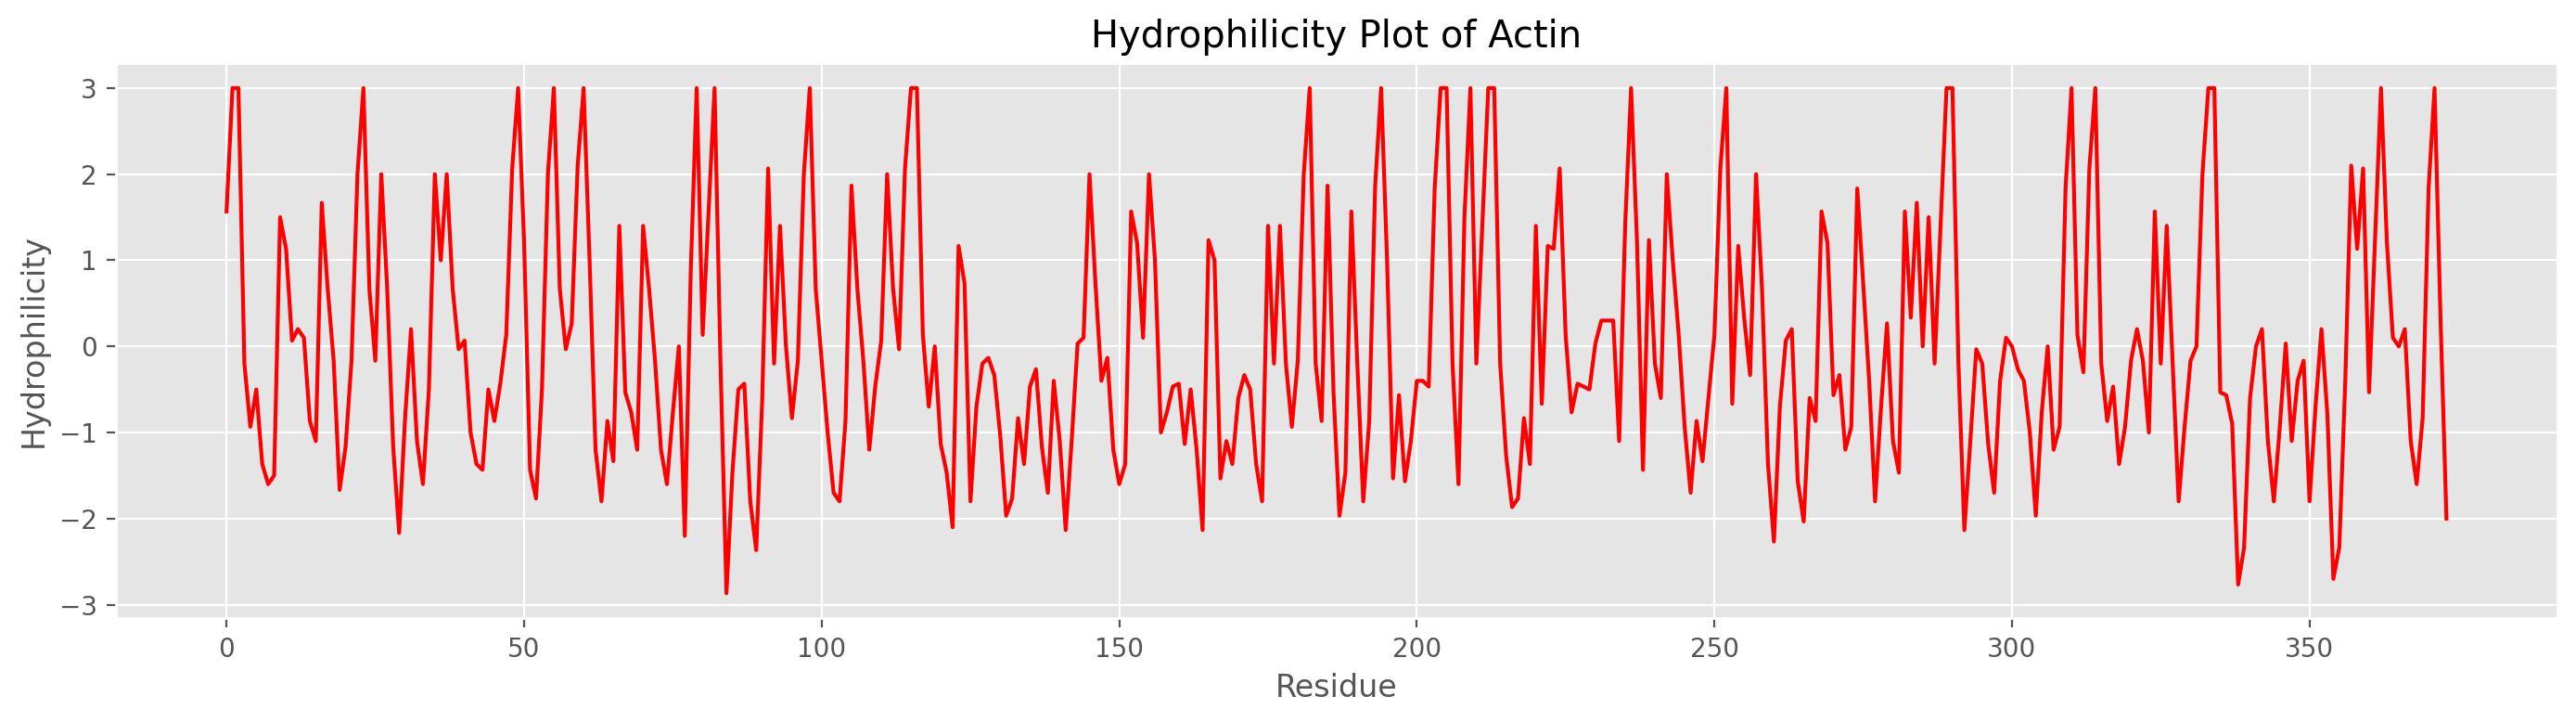

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,4))
plt.plot(range(len(actin_hydropathy)), actin_hydropathy, color = 'r')
plt.xlabel("Residue")
plt.ylabel("Hydrophilicity")
plt.title('Hydrophilicity Plot of Actin')
plt.tight_layout()
#>0 means hydrophilic region

## GAPDH Plot

In [ ]:
#The ProteinAnalysis class takes one argument, the protein sequence as a string and builds a sequence object using the Bio.Seq module
gapdh_analysed_seq = ProteinAnalysis(gb_gapdh)
gapdh_hydropathy = gapdh_analysed_seq.protein_scale(Bio.SeqUtils.ProtParamData.hw,2,1)

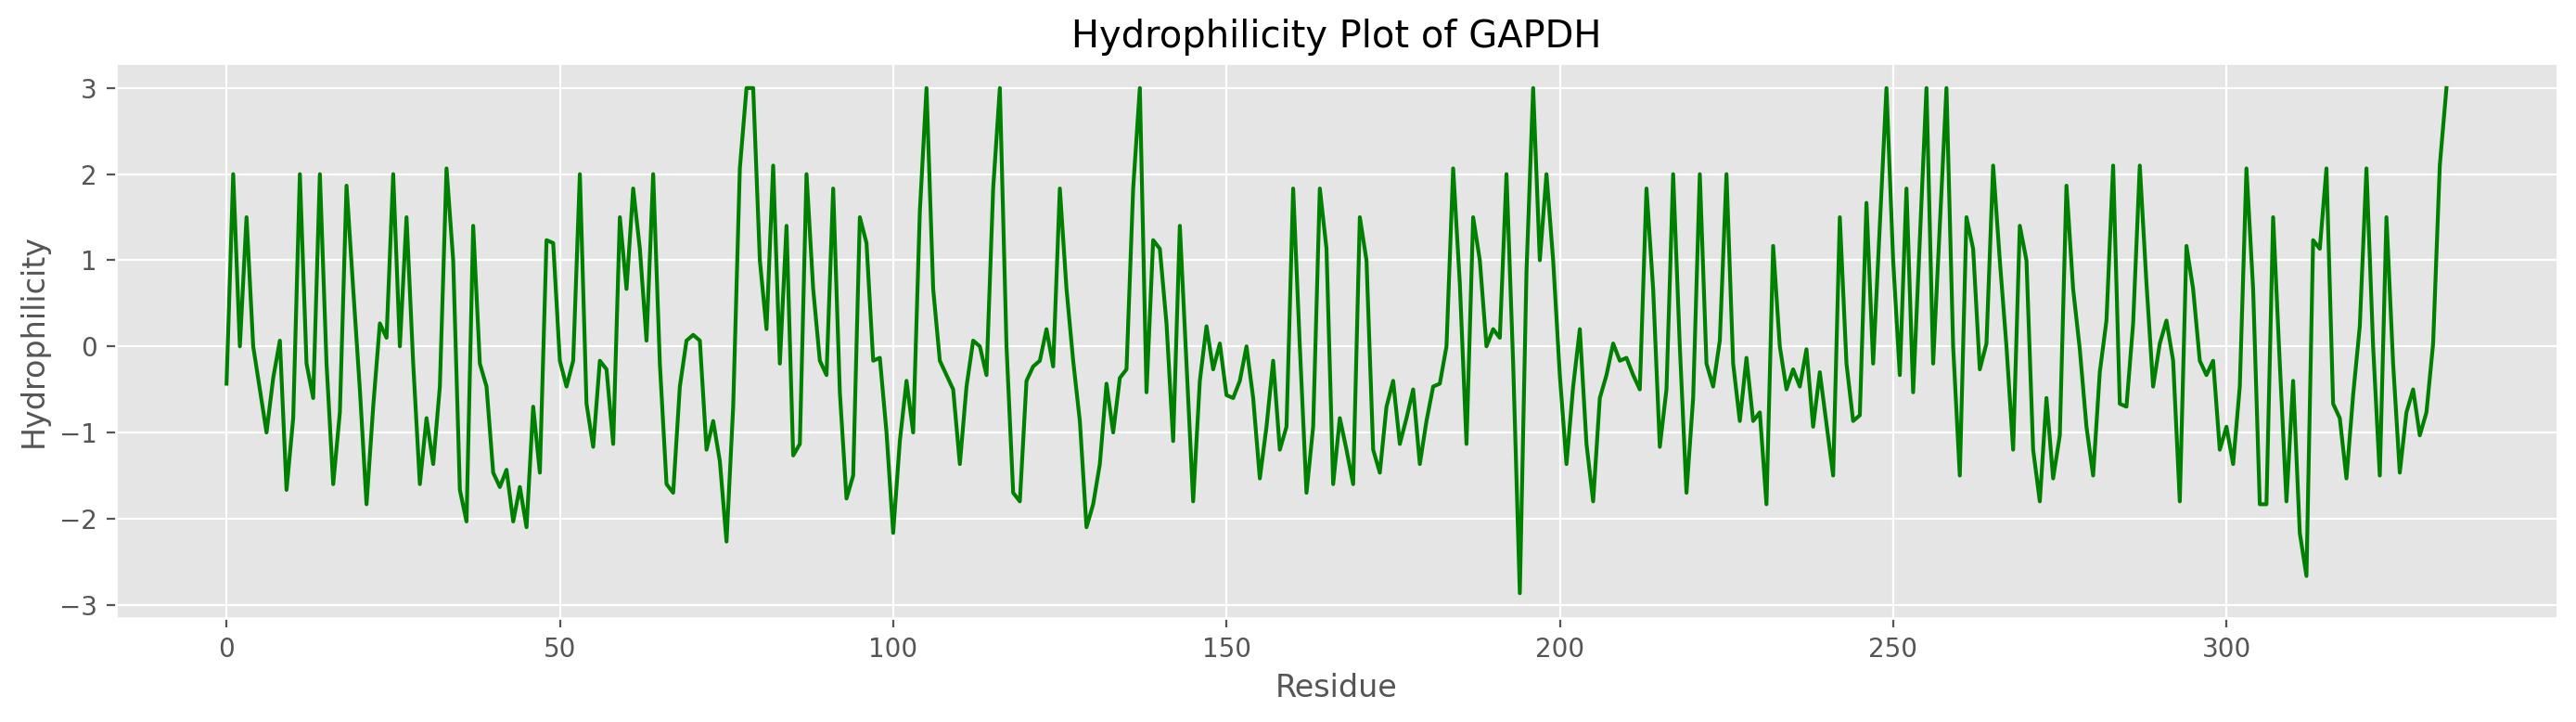

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(range(len(gapdh_hydropathy)), gapdh_hydropathy, color = 'g')
plt.xlabel("Residue")
plt.ylabel("Hydrophilicity")
plt.title('Hydrophilicity Plot of GAPDH')
plt.tight_layout()
#>0 means hydrophilic region

## Generating Real time plot: Actin

In [ ]:
df_actin = pd.DataFrame({"Residue":range(len(actin_hydropathy)), "Hydrophilicity":actin_hydropathy})

In [ ]:
x_a=[]
y_a=[]

fig,ax=plt.subplots()
ax.plot(x_a,y_a)

counter =count(0,1)

def shift_a(i):

    idx=next(counter)
    try:
      x_a.append(df_actin.iloc[idx, 0])
      y_a.append(df_actin.iloc[idx, 1])
    except IndexError:
       print("Index not available")
       sys.exit(1)
    plt.cla()

    ax.set_xlabel('Residues')
    ax.set_ylabel('Hydrophilicity')
    ax.set_title('Actin Hydrophilicity Plot')
    ax.plot(x_a,y_a)


ani_a=FuncAnimation(fig,shift_a,interval=700, frames=100)
video = ani_a.to_html5_video() #make video out of animp animation object
html = display.HTML(video) #html code to perform embedding for above video
display.display(html)#Display the html
plt.close()#prevent drawing static fig

## Generating Real time plot: GAPDH

In [ ]:
df_gapdh = pd.DataFrame({"Residue":range(len(gapdh_hydropathy)), "Hydrophilicity":gapdh_hydropathy})

In [ ]:
x_g=[]
y_g=[]

fig,ax=plt.subplots()
ax.plot(x_g,y_g)

counter =count(0,1)

def shift_g(i):

    idx=next(counter)
    try:
      x_g.append(df_gapdh.iloc[idx, 0])
      y_g.append(df_gapdh.iloc[idx, 1])
    except IndexError:
       print("Index not available")
       sys.exit(1)
    plt.cla()

    ax.set_xlabel('Residues')
    ax.set_ylabel('Hydrophilicity')
    ax.set_title('GAPDH Hydrophilicity Plot')

    ax.plot(x_g,y_g, color = "g")

ani_g=FuncAnimation(fig,shift_g,interval=700, frames=100)
video = ani_g.to_html5_video() #make video out of animp animation object
html = display.HTML(video) #html code to perform embedding for above video
display.display(html)#Display the html
plt.close()#prevent drawing static fig